In [5]:
import torch
import torch.utils.data as data
import cv2
import os
from glob import glob
import numpy as np

In [6]:
root = './data/test/mask'
img_files = glob(os.path.join(root,'image','*.png'))
img_files.sort()

files = os.listdir(root)


import torch
import torch.utils.data as data
import cv2
import os
from glob import glob

class TrainDataset(data.Dataset):
    def __init__(self, root=''):
        super(TrainDataset, self).__init__()
        self.img_files = glob(os.path.join(root,'image','*.png'))
        self.mask_files = []
        for img_path in self.img_files:
            basename = os.path.basename(img_path)
            self.mask_files.append(os.path.join(root,'mask',basename[:-4]+'_mask.png'))
        # get the path of these images  

    def __getitem__(self, index):
            img_path = self.img_files[index]
            mask_path = self.mask_files[index]
            data = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            label = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
            return torch.from_numpy(data).float(), torch.from_numpy(label).float()
            #change it from numpy to tesnor

    def __len__(self):
        return len(self.img_files)
        # how many train images

class TestDataset(data.Dataset):
    def __init__(self, root=''):
        super(TestDataset, self).__init__()
        self.img_files = glob(os.path.join(root,'image','*.png'))

    def __getitem__(self, index):
            img_path = self.img_files[index]
            data = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            return torch.from_numpy(data).float()

    def __len__(self):
        return len(self.img_files)

In [7]:
data_path = './test_data/train'
train_set = TrainDataset(data_path)

NameError: name 'TrainDataset' is not defined

In [6]:
from matplotlib import pyplot as plt
def show_image_mask(img, mask, cmap='gray'): # visualisation
    fig = plt.figure(figsize=(5,5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap=cmap)
    plt.axis('off')

In [7]:
from torch.utils.data import DataLoader
num_workers = 4
batch_size = 4
data_path = './data/train'
train_set = TrainDataset(data_path)
training_data_loader = DataLoader(dataset=train_set, num_workers=num_workers, batch_size=batch_size, shuffle=True)
num_epochs = 2

# for epoch in range(num_epochs):
for iteration, sample in enumerate(training_data_loader):
    img, mask = sample

#     show_image_mask(img[0], mask[0]) 
    #visualise all data in training set
        



In [8]:
from matplotlib import pyplot as plt
def show_image_mask(img, mask, cmap='gray'): # visualisation
    fig = plt.figure(figsize=(5,5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap=cmap)
    plt.axis('off')

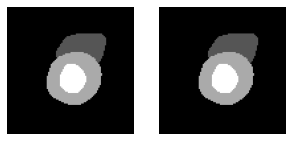

In [70]:
import os
import cv2 #import OpenCV
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

data_dir = './data/test'
image =cv2.imread(os.path.join(data_dir,'mask2','cmr108_mask.png'), cv2.IMREAD_UNCHANGED)
mask = cv2.imread(os.path.join(data_dir,'mask','cmr146_mask.png'), cv2.IMREAD_UNCHANGED)


# cv2.imwrite(os.path.join('./','cmr1.png'), mask*85)
show_image_mask(image, mask, cmap='gray')
# plt.pause(1)
# plt.imshow(mask, cmap='gray')
plt.show()

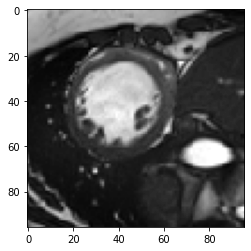

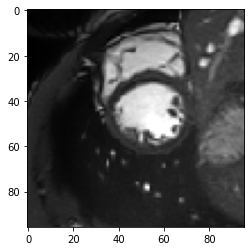

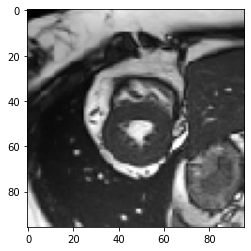

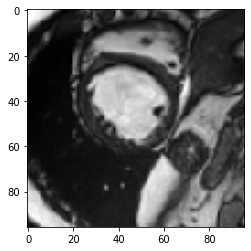

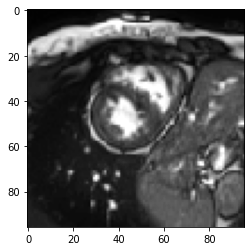

In [41]:
val_path = './data/val/'

num_workers = 4
batch_size = 4

val_set = TrainDataset(val_path)

val_data_loader = DataLoader(dataset=val_set, num_workers=num_workers,batch_size=batch_size, shuffle=False)
for iteration, sample in enumerate(val_data_loader):
    img, mask = sample
#     show_image_mask(img[0,...].squeeze(), mask[0,...].squeeze()) 
    #visualise all data in training set
    plt.imshow(img[0], cmap='gray')
    plt.pause(1)
    plt.close()

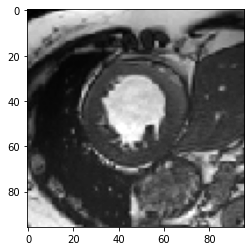

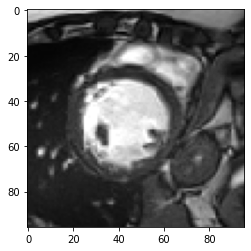

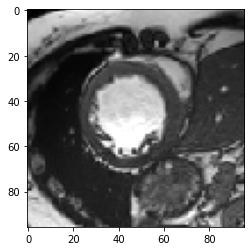

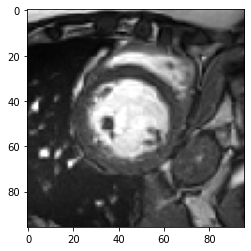

In [29]:
test_path = './test_data/train'
num_workers = 4
batch_size = 1

test_set = TestDataset(test_path)
test_data_loader = DataLoader(dataset=test_set, num_workers=num_workers, batch_size = batch_size, shuffle=False)
i= 121

for iteration, sample in enumerate(test_data_loader):
    plt.imshow(sample[0], cmap='gray')
    plt.pause(1)
    

In [1]:
def categorical_dice(mask1, mask2, label_class=1):
    """
    Dice score of a specified class between two volumes of label masks.
    (classes are encoded but by label class number not one-hot )
    Note: stacks of 2D slices are considered volumes.

    Args:
        mask1: N label masks, numpy array shaped (H, W, N)
        mask2: N label masks, numpy array shaped (H, W, N)
        label_class: the class over which to calculate dice scores

    Returns:
        volume_dice
    """
    mask1_pos = (mask1 == label_class).astype(np.float32)
    mask2_pos = (mask2 == label_class).astype(np.float32)
    dice = 2 * np.sum(mask1_pos * mask2_pos) / (np.sum(mask1_pos) + np.sum(mask2_pos))
    return dice

In [20]:
data_dir = './data/val'
mask1 =cv2.imread(os.path.join(data_dir,'mask','cmr113_mask.png'), cv2.IMREAD_UNCHANGED)
mask2 = cv2.imread(os.path.join(data_dir,'mask2','cmr113_mask.png'), cv2.IMREAD_UNCHANGED)

# label_class = 2
# x = categorical_dice(mask1, mask2, label_class)
mask11 =cv2.imread(os.path.join(data_dir,'mask','cmr111_mask.png'), cv2.IMREAD_UNCHANGED)
mask12 = cv2.imread(os.path.join(data_dir,'mask2','cmr111_mask.png'), cv2.IMREAD_UNCHANGED)
    
mask21 =cv2.imread(os.path.join(data_dir,'mask','cmr112_mask.png'), cv2.IMREAD_UNCHANGED)
mask22 = cv2.imread(os.path.join(data_dir,'mask2','cmr112_mask.png'), cv2.IMREAD_UNCHANGED)
    
mask31 =cv2.imread(os.path.join(data_dir,'mask','cmr113_mask.png'), cv2.IMREAD_UNCHANGED)
mask32 = cv2.imread(os.path.join(data_dir,'mask2','cmr113_mask.png'), cv2.IMREAD_UNCHANGED)
    
mask41 =cv2.imread(os.path.join(data_dir,'mask','cmr114_mask.png'), cv2.IMREAD_UNCHANGED)
mask42 = cv2.imread(os.path.join(data_dir,'mask2','cmr114_mask.png'), cv2.IMREAD_UNCHANGED)
    
mask51 =cv2.imread(os.path.join(data_dir,'mask','cmr115_mask.png'), cv2.IMREAD_UNCHANGED)
mask52 = cv2.imread(os.path.join(data_dir,'mask2','cmr115_mask.png'), cv2.IMREAD_UNCHANGED)


true_mask =np.array([mask11, mask21, mask31, mask41, mask51])
predict_mask = np.array([mask12, mask22, mask32, mask42, mask52])


label_class = 3
x = categorical_dice(mask1, mask2, label_class)
print(x)

# for i in range(5):
#     summary = 0
#     labe_class = 1
#     for j in range(3):
#         x = categorical_dice(true_mask[i], predict_mask[i], labe_class)
#         summary +=x
#         labe_class +=1
#     average = summary/3
#     print(average)

0.8381112984822934
